In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("us_contagious_diseases.csv")
data = data[(data['state']=='California') & (data['disease']=='Measles')]
X = data['year'].values
Y = data['count'].values

In [3]:
class WeightedLR():
    def fit_predict(self, X, Y, x_0, lam):
        B = np.insert(X.reshape(-1,1), 0, 1, axis=1)
        W_x0 = np.diag([np.exp((-(np.linalg.norm(x-x_0)**2))/(2*lam**2)) for x in X])
        parameters = np.dot(np.linalg.inv(np.dot(np.dot(B.T , W_x0) , B)),
                            np.dot(np.dot(B.T, W_x0), Y))

        return np.dot(np.insert(x_0.reshape(-1,1), 0, 1, axis=1), parameters)

In [4]:
def makePlots(X, Y,lam):
    wLR = WeightedLR()
    Y_pred = [] 
    for x_0 in X:
        Y_pred.append(wLR.fit_predict(X, Y, x_0, lam))
    plt.plot(X, Y, 'o', X, Y_pred)
    plt.title('Lambda :' + str(lam))
    plt.ylabel('Count for the year')
    plt.xlabel('Year')
    plt.show()

In [5]:
def plotFor_Bandwidth(X, Y, n=10):
    for i in range(0, n):
        lam = i*0.5 * i**0.2 + 0.1
        makePlots(X,Y, lam)

### Plotting the number of occurrences of measles in California as function of years. Overlaying on the plot the local linear regressions fitted to these data, for several values of the tuning parameter λ.

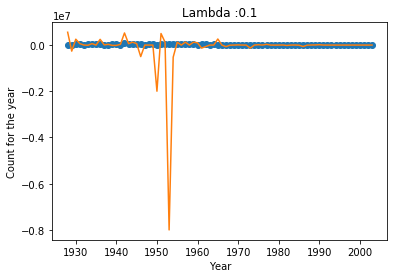

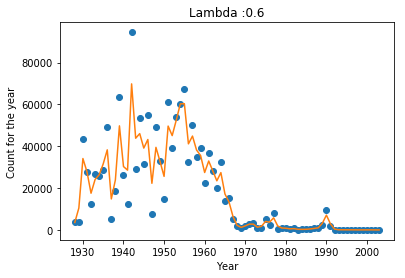

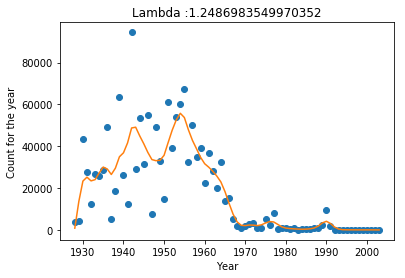

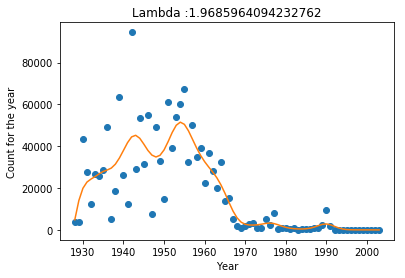

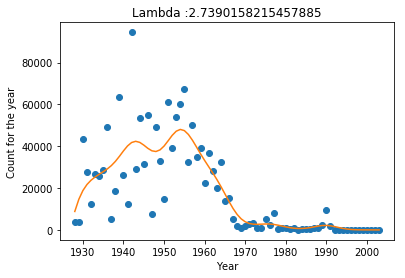

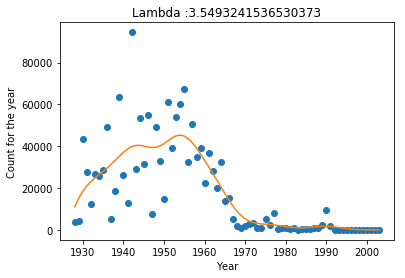

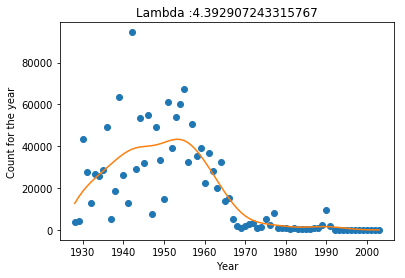

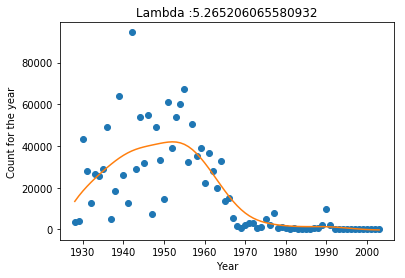

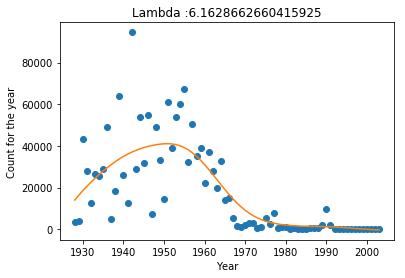

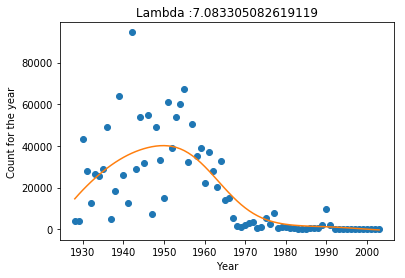

In [6]:
plotFor_Bandwidth(X,Y)

Before 1970 the occurrences of measles was much higher and as seen from this paper the vaccine for measles was founded by 1978 after which the occurrences reduces.
https://www.cdc.gov/measles/about/history.html

### Implementint Naiive Bayes classifier, using Gaussian kernel for density estimation, as function of the tuning parameter λ. 

In [7]:
dataset = np.loadtxt("hw3_dataset.txt")
X = dataset[:, [2,3,4]]
Y = dataset[:, 1]
train_x, temp, train_y, temp_y = train_test_split(X, Y, test_size=0.667)
dev_x, eval_x, dev_y, eval_y = train_test_split(temp, temp_y, test_size=0.5)
print(train_x.shape, dev_x.shape, eval_x.shape)

(160, 3) (161, 3) (161, 3)


In [8]:
def Kernel(x,train_x,lam):
    N = len(train_x)
    e = np.sum(np.exp(-0.5 * ((np.abs(x - train_x)/ lam)**2)))
    return (1/(N*lam*np.sqrt(2*np.pi))) * e

In [9]:
def NaiveBaseGK(train_x, train_y, target_x, lam=1000):
    final_probs = []
    for i in np.unique(train_y):
        probs = []
        train_class_x = train_x[np.where(train_y == i)]
        prior_prob = len(train_class_x) / len(train_x)
        #print(prior_prob)
        for row in target_x:
            result =  prior_prob
            for col in range(len(row)):
                result *= Kernel(row[col], train_class_x[:, col], lam)
            probs.append(result)
        final_probs.append(probs)
    return np.array(final_probs).T

In [10]:
def plotForLam(lams, train_x, train_y, test_x, test_y):
    acc = []
    for lam in lams:
        x = NaiveBaseGK(train_x, train_y, test_x, lam=lam)
        pred_y = np.argmax(x, axis=1)
        acc.append(accuracy_score(test_y, pred_y))
    plt.plot(lams, acc)
    plt.xlabel('Lamda Value')
    plt.ylabel('Accuracy')
    plt.show()
    bestlam = lams[acc.index(max(acc))]
    print('Best Accuracy with lamda = ' + str(bestlam) )
    return bestlam

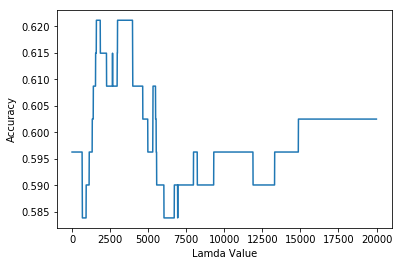

Best Accuracy with lamda = 1601


In [11]:
best_lam = plotForLam(np.arange(1,20000,10), train_x, train_y, dev_x, dev_y)

In [12]:
x = NaiveBaseGK(train_x, train_y, eval_x, lam=best_lam)
pred_y = np.argmax(x, axis=1)
accuracy_score(eval_y, pred_y)

0.6149068322981367